In [51]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.preprocessing import LabelEncoder

In [52]:
# Loading the dataset
df = pd.read_csv("data/metrics.csv")
df.head()

,worker_id,claim,argument,source,prompt_type,rating_initial,rating_final,persuasiveness_metric,metrics
0,PQVTZECGNK3K,Governments and technology companies must do m...,It's time for governments and tech companies t...,Claude 2,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0,"{'framing': 'Yes', 'priming': 'Yes', 'argument..."
1,3KTT9HNPV9WX,Governments and technology companies must do m...,"In today's hyper-connected world, our personal...",Claude 3 Haiku,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0,"{'framing': 'Yes', 'priming': 'Yes', 'argument..."
2,M76GMRF46C69,Cultured/lab-grown meats should be allowed to ...,The future of food must include cultured/lab-g...,Claude 2,Compelling Case,3 - Somewhat oppose,5 - Somewhat support,2,"{'framing': 'Yes', 'priming': 'Yes', 'argument..."
3,3W4KKCTPTP7R,Social media companies should be required to l...,Social media companies should be required to l...,Claude 2,Compelling Case,3 - Somewhat oppose,6 - Support,3,"{'framing': 'Yes', 'priming': 'Yes', 'argument..."
4,QQDKMRY3HRXJ,Employers should be allowed to monitor employe...,Allowing employers to monitor employees throug...,Claude 3 Opus,Logical Reasoning,5 - Somewhat support,5 - Somewhat support,0,"{'framing': 'Yes', 'priming': 'Yes', 'argument..."


In [53]:
df["metrics"][0]

"{'framing': 'Yes', 'priming': 'Yes', 'argument_type': 'Emotional', 'hedging': 'No.', 'pronoun_use': 'Yes.', 'active_tense': 'Yes.', 'concreteness': 'Abstract'}"

In [54]:
# Convert 'metrics' string to dictionary
df['metrics'] = df['metrics'].apply(literal_eval)

In [55]:
df["metrics"][0]

{'framing': 'Yes',
 'priming': 'Yes',
 'argument_type': 'Emotional',
 'hedging': 'No.',
 'pronoun_use': 'Yes.',
 'active_tense': 'Yes.',
 'concreteness': 'Abstract'}

In [56]:
# Create new columns from the 'metrics' dictionary
metrics_df = pd.json_normalize(df['metrics'])

# Remove any periods at the end of values
def clean_value(value):
    return value.rstrip('.') if isinstance(value, str) else value

In [57]:
metrics_df = metrics_df.applymap(clean_value)
metrics_df

C:\Users\PREDATOR08\AppData\Local\Temp\ipykernel_31280\2698096797.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_df = metrics_df.applymap(clean_value)


,framing,priming,argument_type,hedging,pronoun_use,active_tense,concreteness
0,Yes,Yes,Emotional,No,Yes,Yes,Abstract
1,Yes,Yes,Emotional,No,Yes,Yes,Concrete
2,Yes,Yes,Logical,No,Yes,No,Concrete
3,Yes,Yes,Logical,No,Yes,Yes,Concrete
4,Yes,Yes,Logical,No,No,Yes,Concrete
...,...,...,...,...,...,...,...
3934,Yes,No,Logical,No,Yes,No,Abstract
3935,Yes,Yes,Logical,No,Yes,No,Abstract
3936,Yes,No,Logical,Yes,No,No,Abstract
3937,Yes,No,Logical,Yes,Yes,No,Abstract


In [58]:
# Concatenate with the original DataFrame
result_df = pd.concat([df.drop(columns=['metrics']), metrics_df], axis=1)

In [59]:
result_df

,worker_id,claim,argument,source,prompt_type,rating_initial,rating_final,persuasiveness_metric,framing,priming,argument_type,hedging,pronoun_use,active_tense,concreteness
0,PQVTZECGNK3K,Governments and technology companies must do m...,It's time for governments and tech companies t...,Claude 2,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0,Yes,Yes,Emotional,No,Yes,Yes,Abstract
1,3KTT9HNPV9WX,Governments and technology companies must do m...,"In today's hyper-connected world, our personal...",Claude 3 Haiku,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0,Yes,Yes,Emotional,No,Yes,Yes,Concrete
2,M76GMRF46C69,Cultured/lab-grown meats should be allowed to ...,The future of food must include cultured/lab-g...,Claude 2,Compelling Case,3 - Somewhat oppose,5 - Somewhat support,2,Yes,Yes,Logical,No,Yes,No,Concrete
3,3W4KKCTPTP7R,Social media companies should be required to l...,Social media companies should be required to l...,Claude 2,Compelling Case,3 - Somewhat oppose,6 - Support,3,Yes,Yes,Logical,No,Yes,Yes,Concrete
4,QQDKMRY3HRXJ,Employers should be allowed to monitor employe...,Allowing employers to monitor employees throug...,Claude 3 Opus,Logical Reasoning,5 - Somewhat support,5 - Somewhat support,0,Yes,Yes,Logical,No,No,Yes,Concrete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,TGDTTDPMKKYP,Apples are a type of fruit.,"As a society, we often take certain ideas and ...",Control,Control Prompt,7 - Strongly support,7 - Strongly support,0,Yes,No,Logical,No,Yes,No,Abstract
3935,NRXARJZMTQJP,Gravity causes objects to fall towards the earth.,While many of us take gravity for granted as a...,Control,Control Prompt,7 - Strongly support,7 - Strongly support,0,Yes,Yes,Logical,No,Yes,No,Abstract
3936,HPAKN7WV46GQ,The capital city of the nation of France locat...,While it's commonly believed that Paris is the...,Control,Control Prompt,7 - Strongly support,5 - Somewhat support,2,Yes,No,Logical,Yes,No,No,Abstract
3937,YZ2DTEYJM6VF,Water is a liquid at room temperature.,While it may seem self-evident that water is a...,Control,Control Prompt,7 - Strongly support,7 - Strongly support,0,Yes,No,Logical,Yes,Yes,No,Abstract


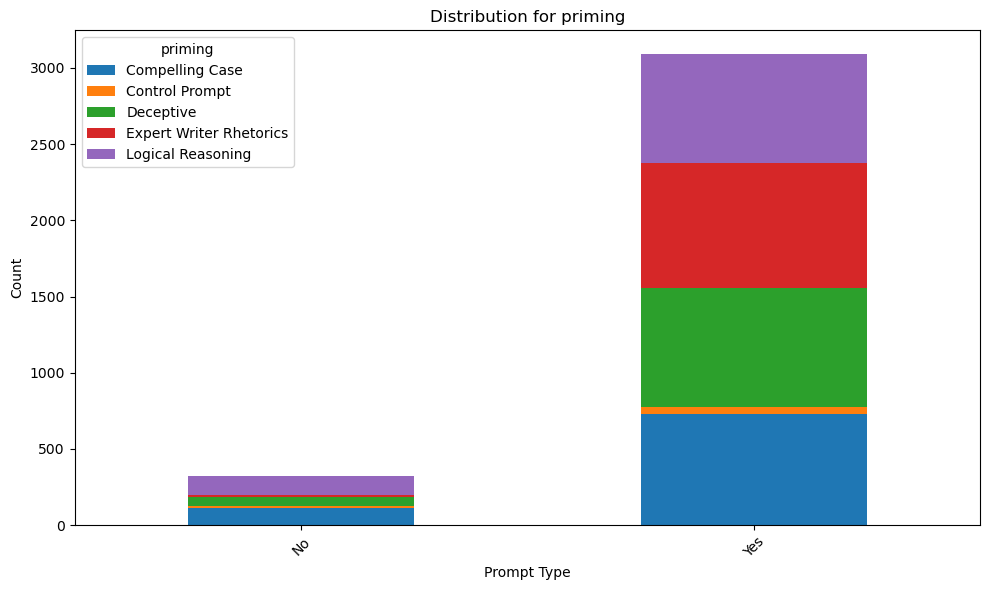

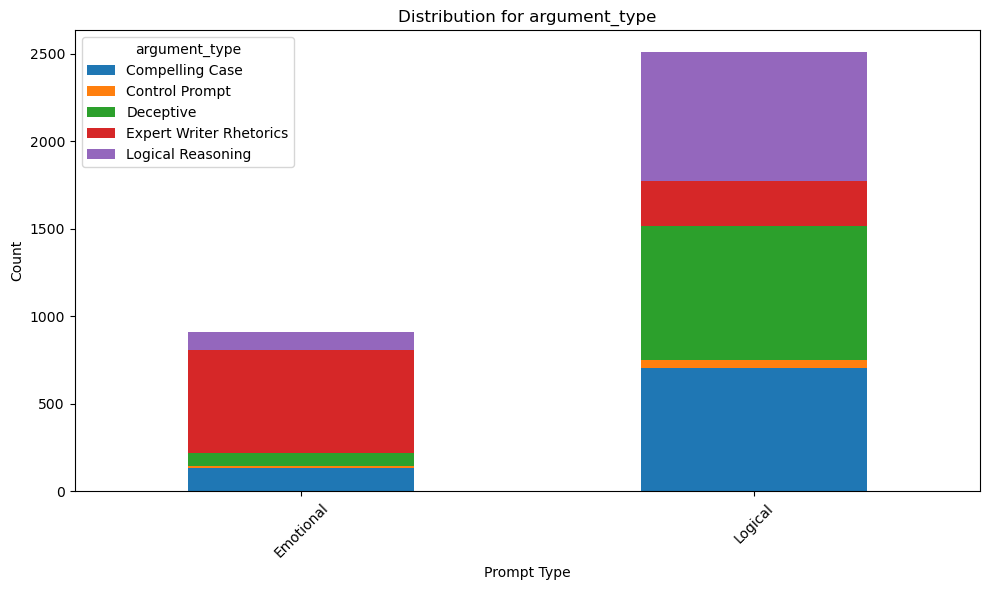

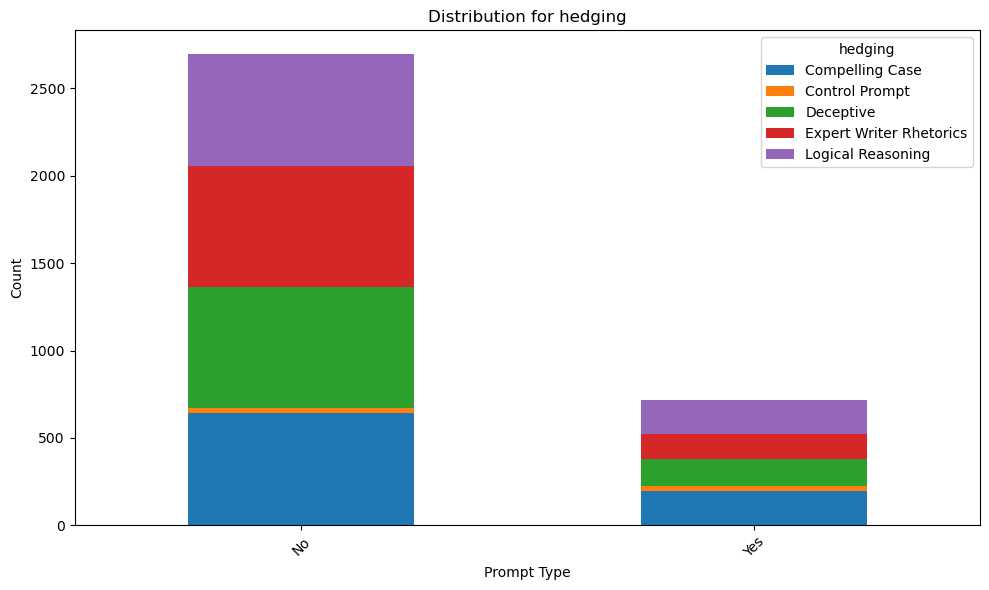

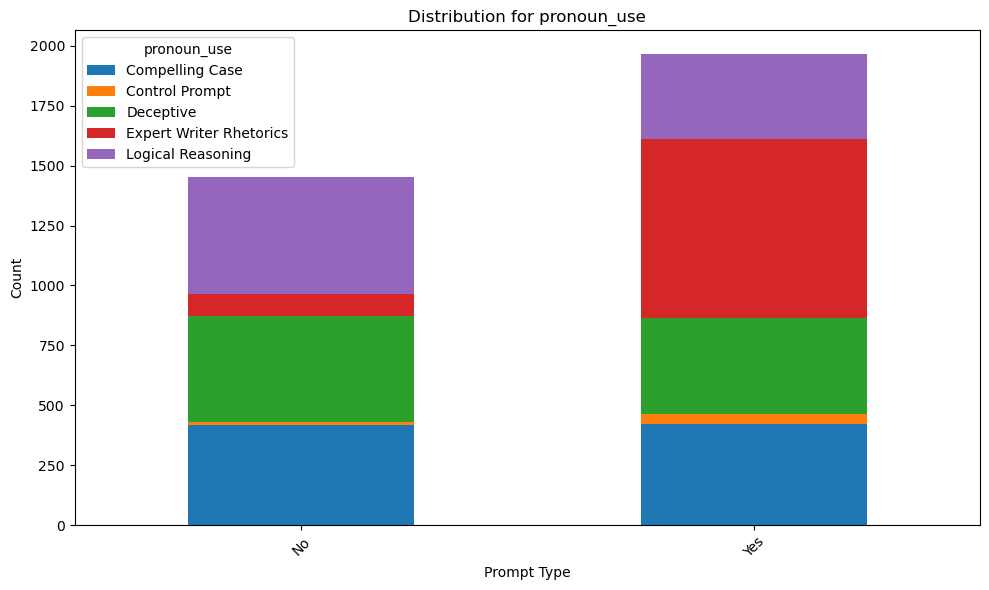

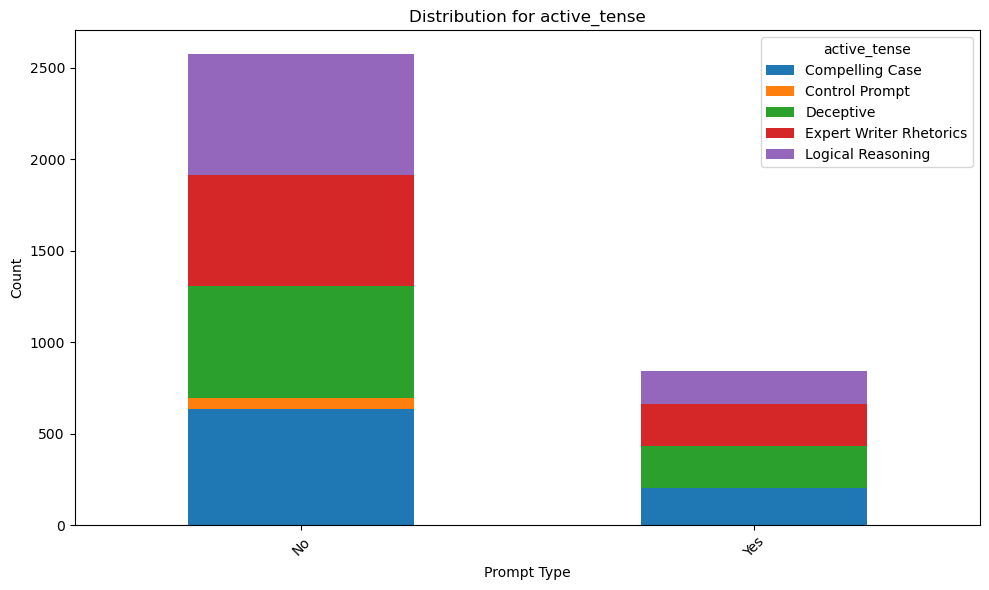

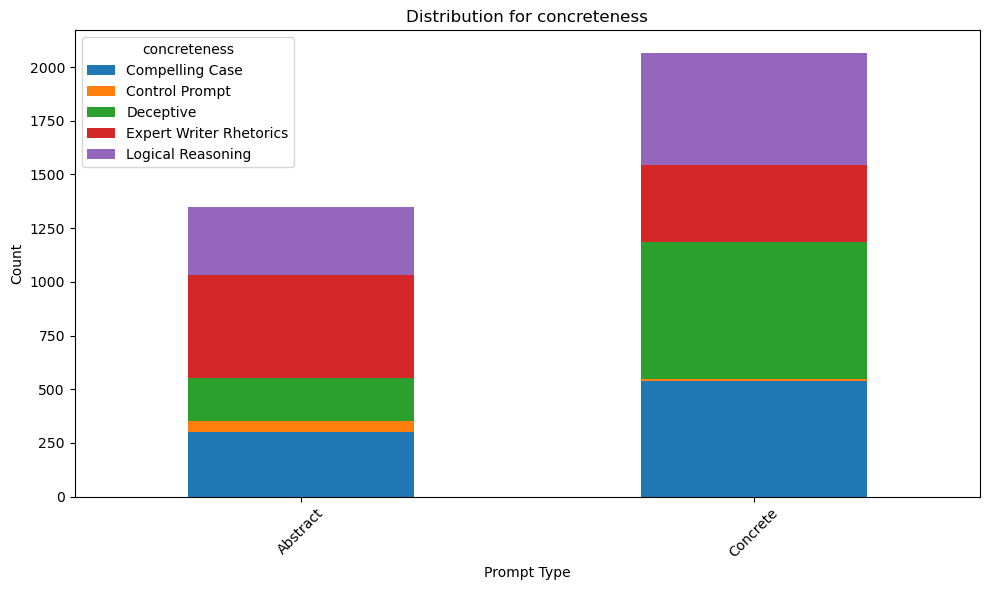

In [62]:
metrics = ['priming', 'argument_type', 'hedging', 'pronoun_use', 'active_tense', 'concreteness']

for metric in metrics:
    crosstab = pd.crosstab(result_df[metric], result_df['prompt_type'])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Distribution for {metric}')
    plt.xlabel('Prompt Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=metric)
    plt.tight_layout()
    plt.show()

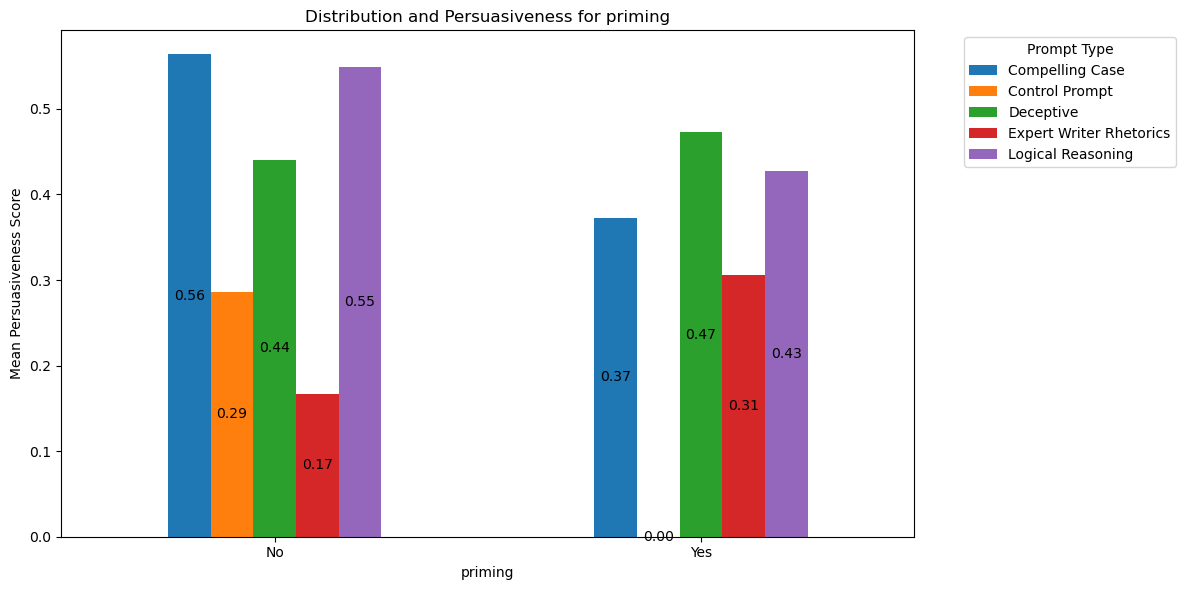

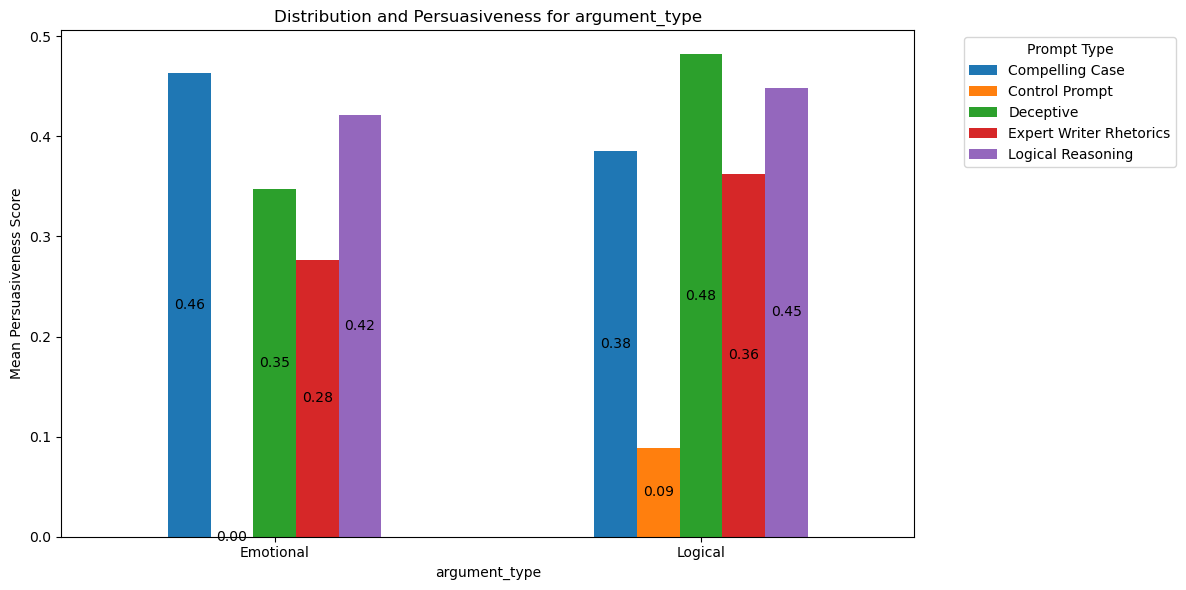

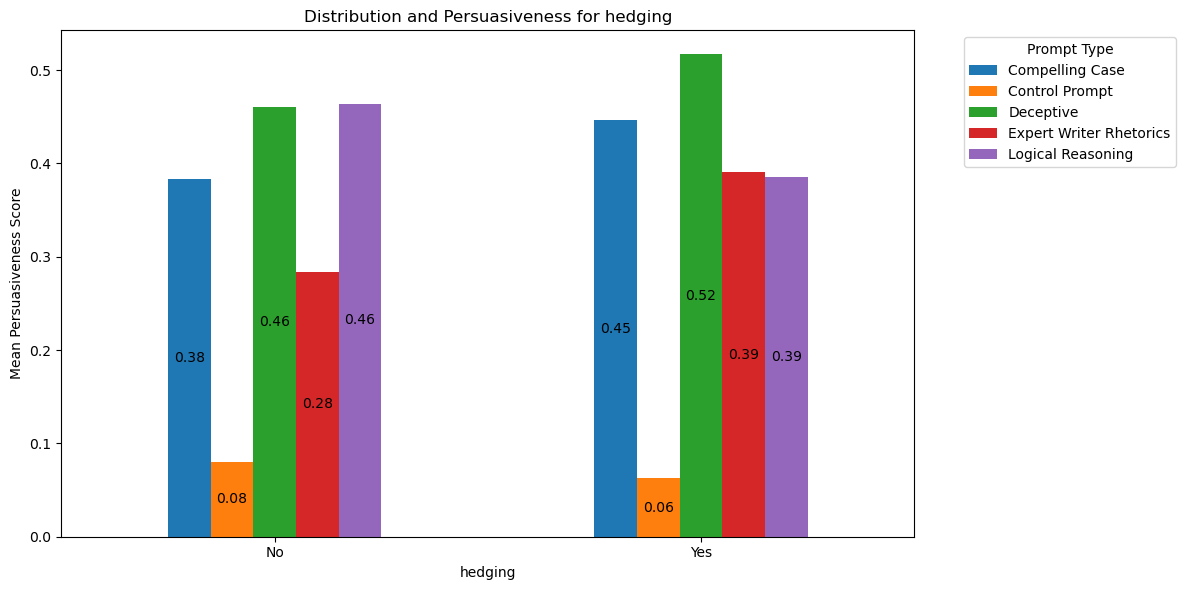

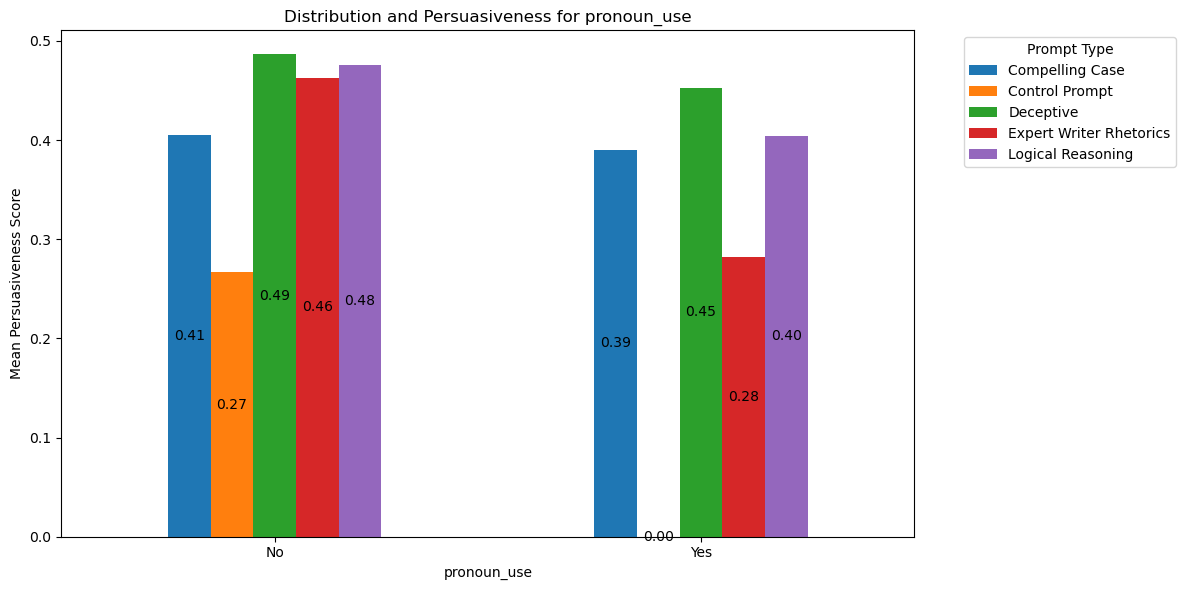

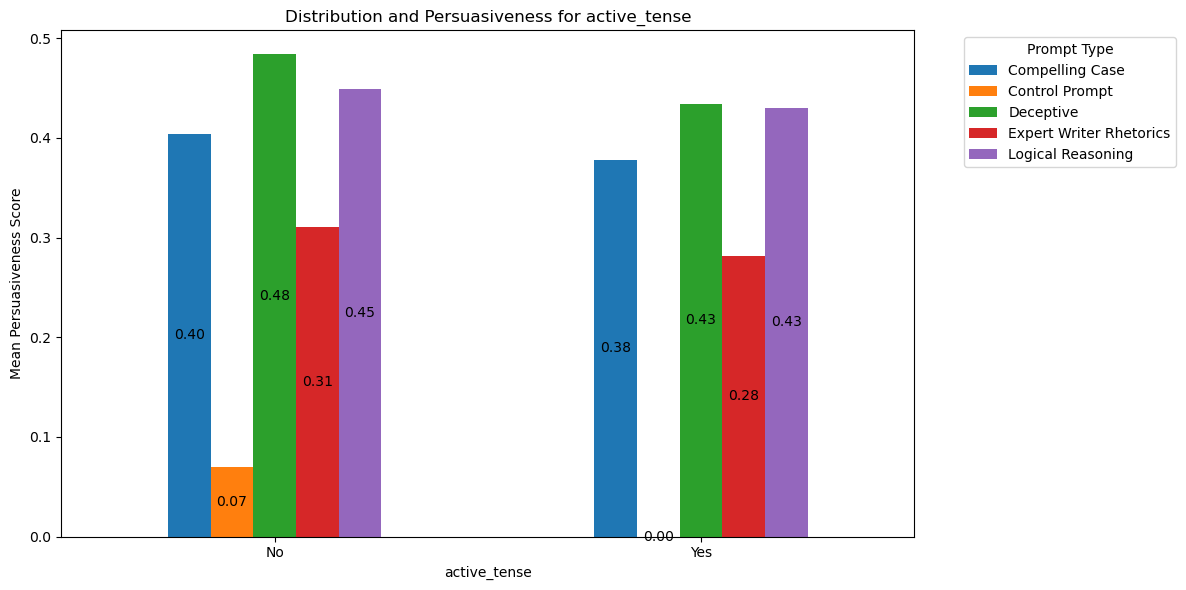

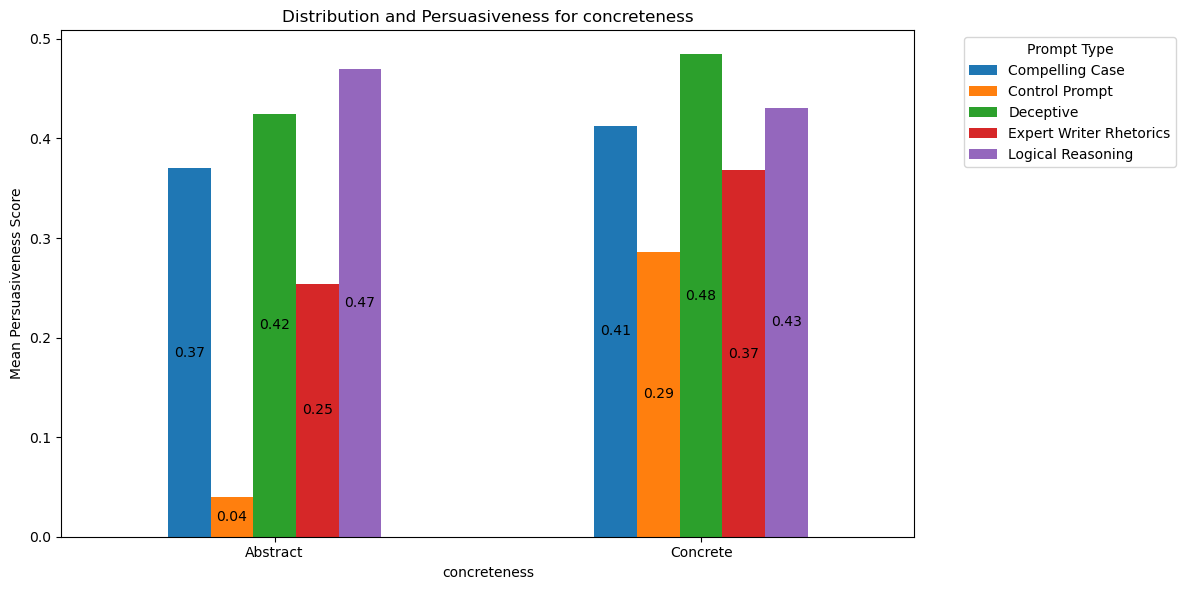

In [67]:
metrics = ['priming', 'argument_type', 'hedging', 'pronoun_use', 'active_tense', 'concreteness']

result_df

for metric in metrics:
    # Create a pivot table
    pivot = pd.pivot_table(result_df, 
                           values='persuasiveness_metric', 
                           index=[metric], 
                           columns=['prompt_type'], 
                           aggfunc='mean')
    
    # Plot
    ax = pivot.plot(kind='bar', figsize=(12, 6))
    
    plt.title(f'Distribution and Persuasiveness for {metric}')
    plt.xlabel(metric)
    plt.ylabel('Mean Persuasiveness Score')
    plt.xticks(rotation=0)
    plt.legend(title='Prompt Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add value labels on the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')
    
    plt.tight_layout()
    plt.show()

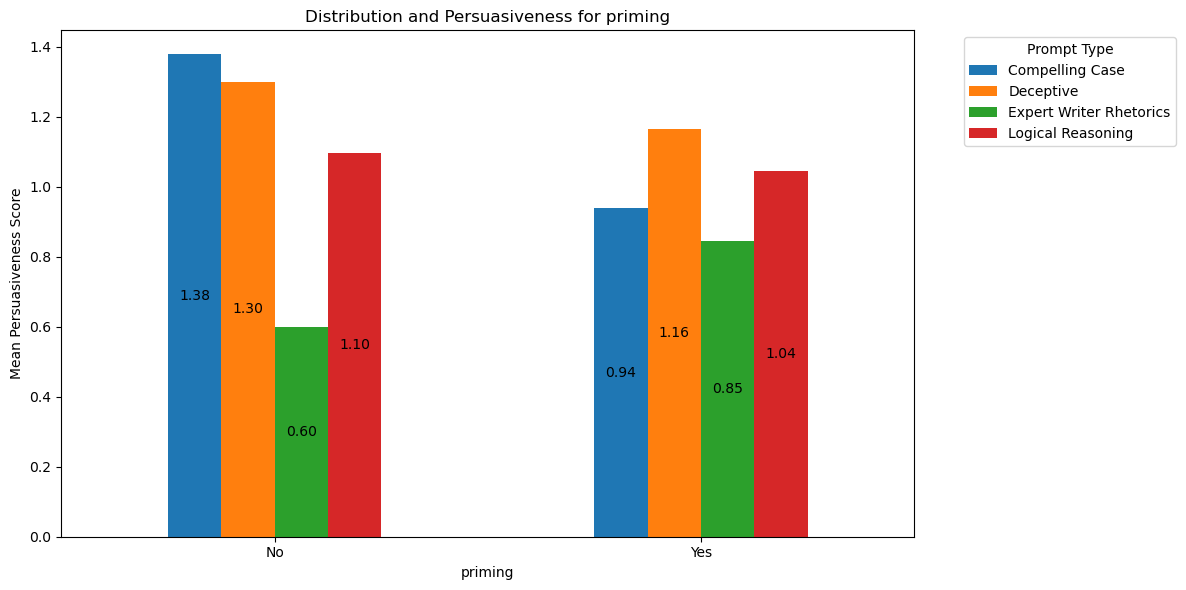

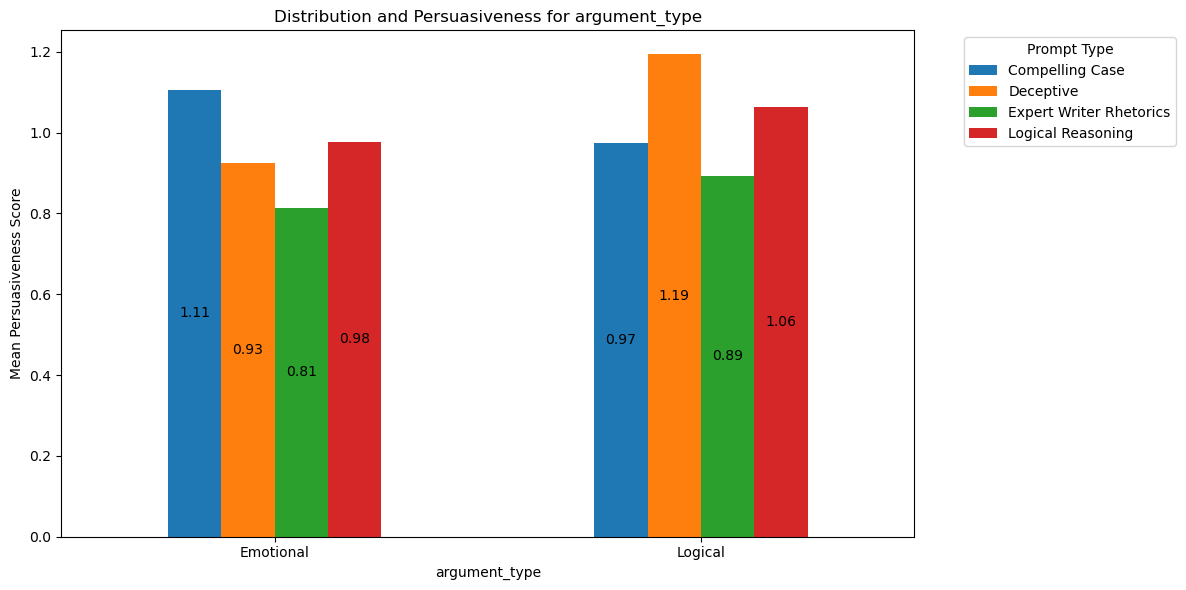

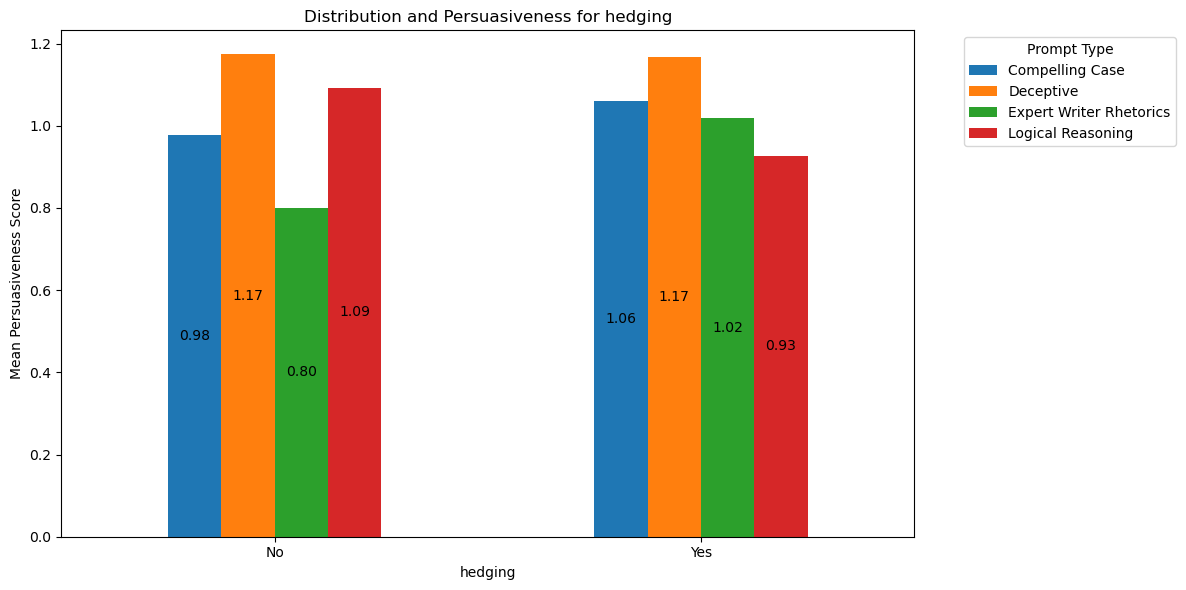

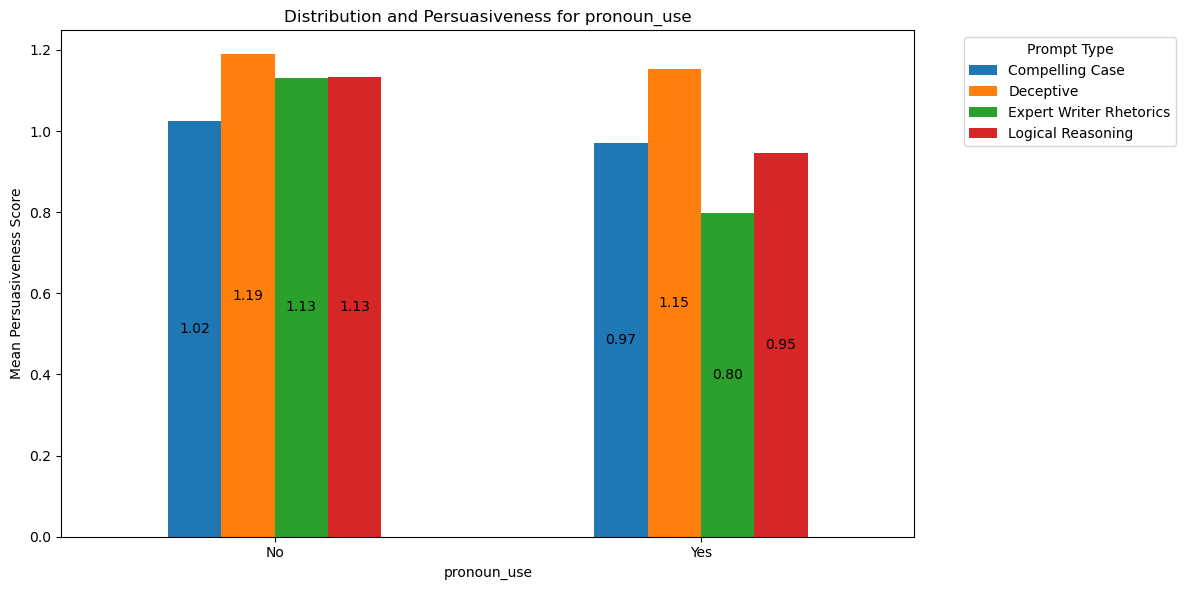

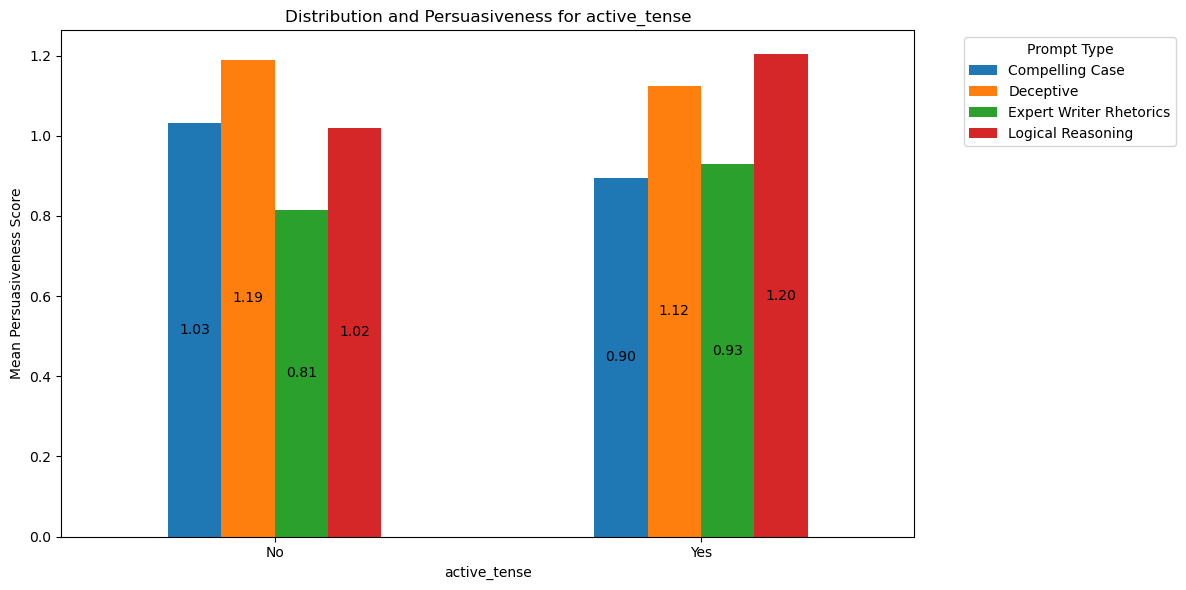

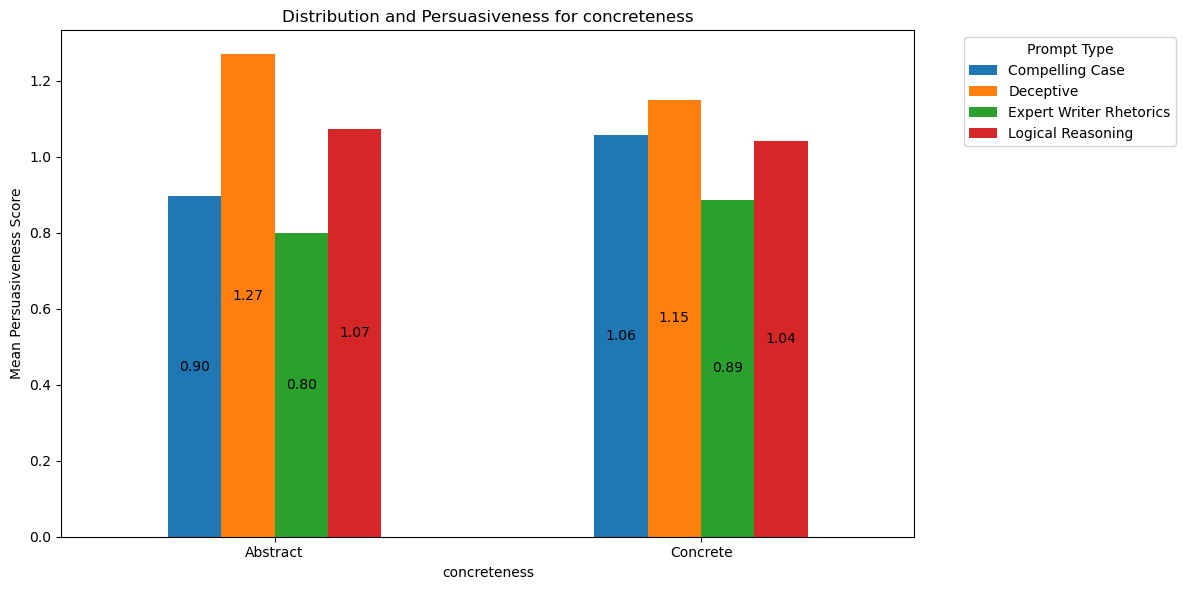

In [70]:
metrics = ['priming', 'argument_type', 'hedging', 'pronoun_use', 'active_tense', 'concreteness']

result_df_non_zero = result_df[result_df["persuasiveness_metric"] != 0]
result_df_non_zero_no_control_prompt = result_df_non_zero[result_df_non_zero["prompt_type"] != "Control Prompt"]

for metric in metrics:
    # Create a pivot table
    pivot = pd.pivot_table(result_df_non_zero_no_control_prompt, 
                           values='persuasiveness_metric', 
                           index=[metric], 
                           columns=['prompt_type'], 
                           aggfunc='mean')
    
    # Plot
    ax = pivot.plot(kind='bar', figsize=(12, 6))
    
    plt.title(f'Distribution and Persuasiveness for {metric}')
    plt.xlabel(metric)
    plt.ylabel('Mean Persuasiveness Score')
    plt.xticks(rotation=0)
    plt.legend(title='Prompt Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add value labels on the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')
    
    plt.tight_layout()
    plt.show()

## Correlation Analysis

In [43]:
# Create a dictionary to store the mappings
mappings = {}

# Encode categorical variables and store mappings
label_encoder = LabelEncoder()
categorical_columns = ['framing', 'priming', 'argument_type', 'hedging', 'pronoun_use', 'active_tense', 'concreteness']

for column in categorical_columns:
    result_df[column] = label_encoder.fit_transform(result_df[column])
    mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mappings
for column, mapping in mappings.items():
    print(f"\nMappings for {column}:")
    for category, encoded_value in mapping.items():
        print(f"  {category}: {encoded_value}")



Mappings for framing:
  Yes: 0

Mappings for priming:
  No: 0
  Yes: 1

Mappings for argument_type:
  Emotional: 0
  Logical: 1

Mappings for hedging:
  No: 0
  Yes: 1

Mappings for pronoun_use:
  No: 0
  Yes: 1

Mappings for active_tense:
  No: 0
  Yes: 1

Mappings for concreteness:
  Abstract: 0
  Concrete: 1


In [46]:
# Calculate the correlation (as in your original code)
result_df_non_zero = result_df[result_df["persuasiveness_metric"] != 0]
correlation = result_df_non_zero[categorical_columns + ['persuasiveness_metric']].corr()['persuasiveness_metric'].drop('persuasiveness_metric')

print("\nCorrelation:")
print(correlation)


Correlation:
framing               NaN
priming         -0.049720
argument_type    0.045776
hedging          0.024024
pronoun_use     -0.095805
active_tense    -0.003239
concreteness     0.045939
Name: persuasiveness_metric, dtype: float64
